In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-prediction-based-on-customer-behavior/Test Data.csv
/kaggle/input/loan-prediction-based-on-customer-behavior/Training Data.csv
/kaggle/input/loan-prediction-based-on-customer-behavior/Sample Prediction Dataset.csv


**Import relevant libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()


**Load data**

In [4]:
train_data = pd.read_csv('/kaggle/input/loan-prediction-based-on-customer-behavior/Training Data.csv')
train_data

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


**Exploratory Data Analysis**

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [5]:
train_data.describe(include='all')

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000,252000,252000,252000,252000,252000,252000.000000,252000.000000,252000.000000
unique,NaN,NaN,NaN,NaN,2,3,2,51,317,29,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,226272,231898,176000,5957,1259,28400,NaN,NaN,NaN
mean,126000.500000,4.997117e+06,49.954071,10.084437,NaN,NaN,NaN,NaN,NaN,NaN,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,NaN,NaN,NaN,NaN,NaN,NaN,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,13.000000,0.000000


In [6]:
#separate numeric and categorical features for analysis
numeric_features = list(train_data.select_dtypes("int64").columns)
categorical_features = list(train_data.select_dtypes("object").columns)

print(f'numeric_features:\n{numeric_features}\n\ncategorical_features:\n{categorical_features}')

numeric_features:
['Id', 'Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag']

categorical_features:
['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']


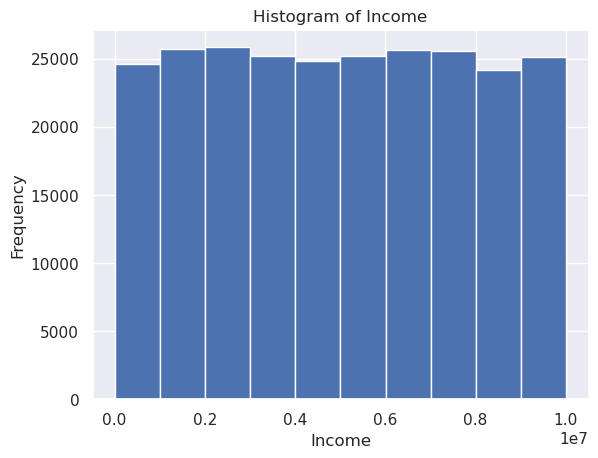

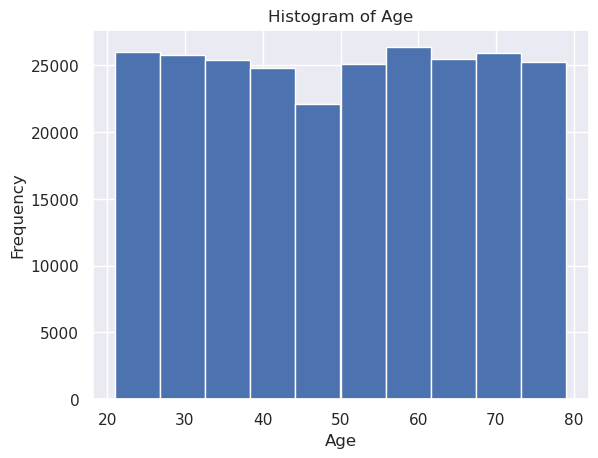

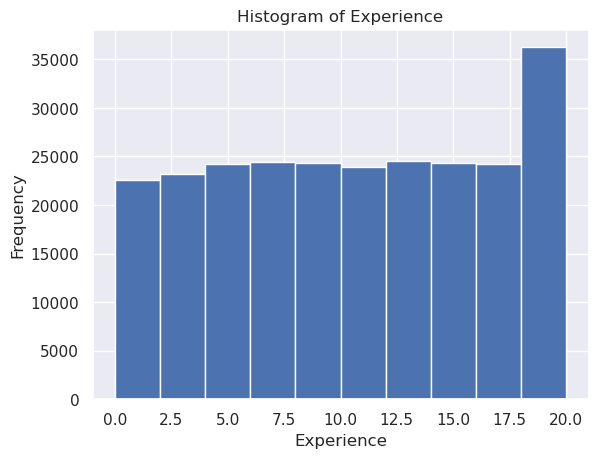

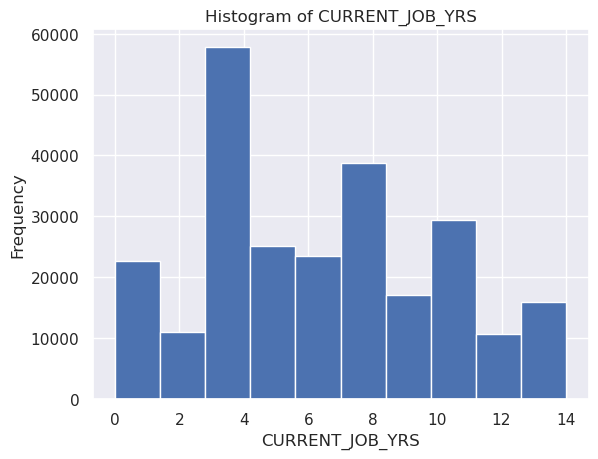

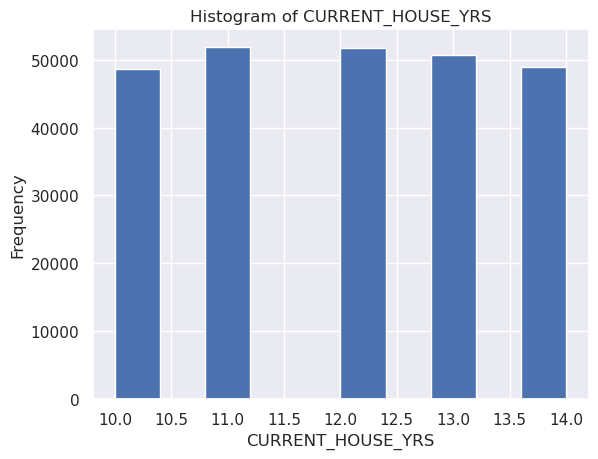

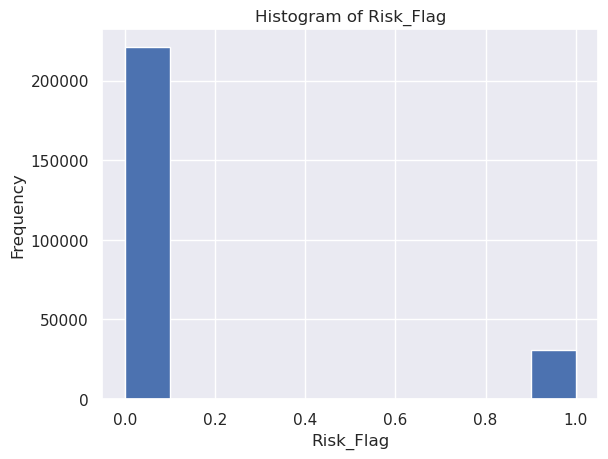

In [7]:
#plot distribution of numeric features
numeric_features = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag']
for feature in numeric_features:
    train_data[feature].hist(bins=10)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature}')
    plt.show()


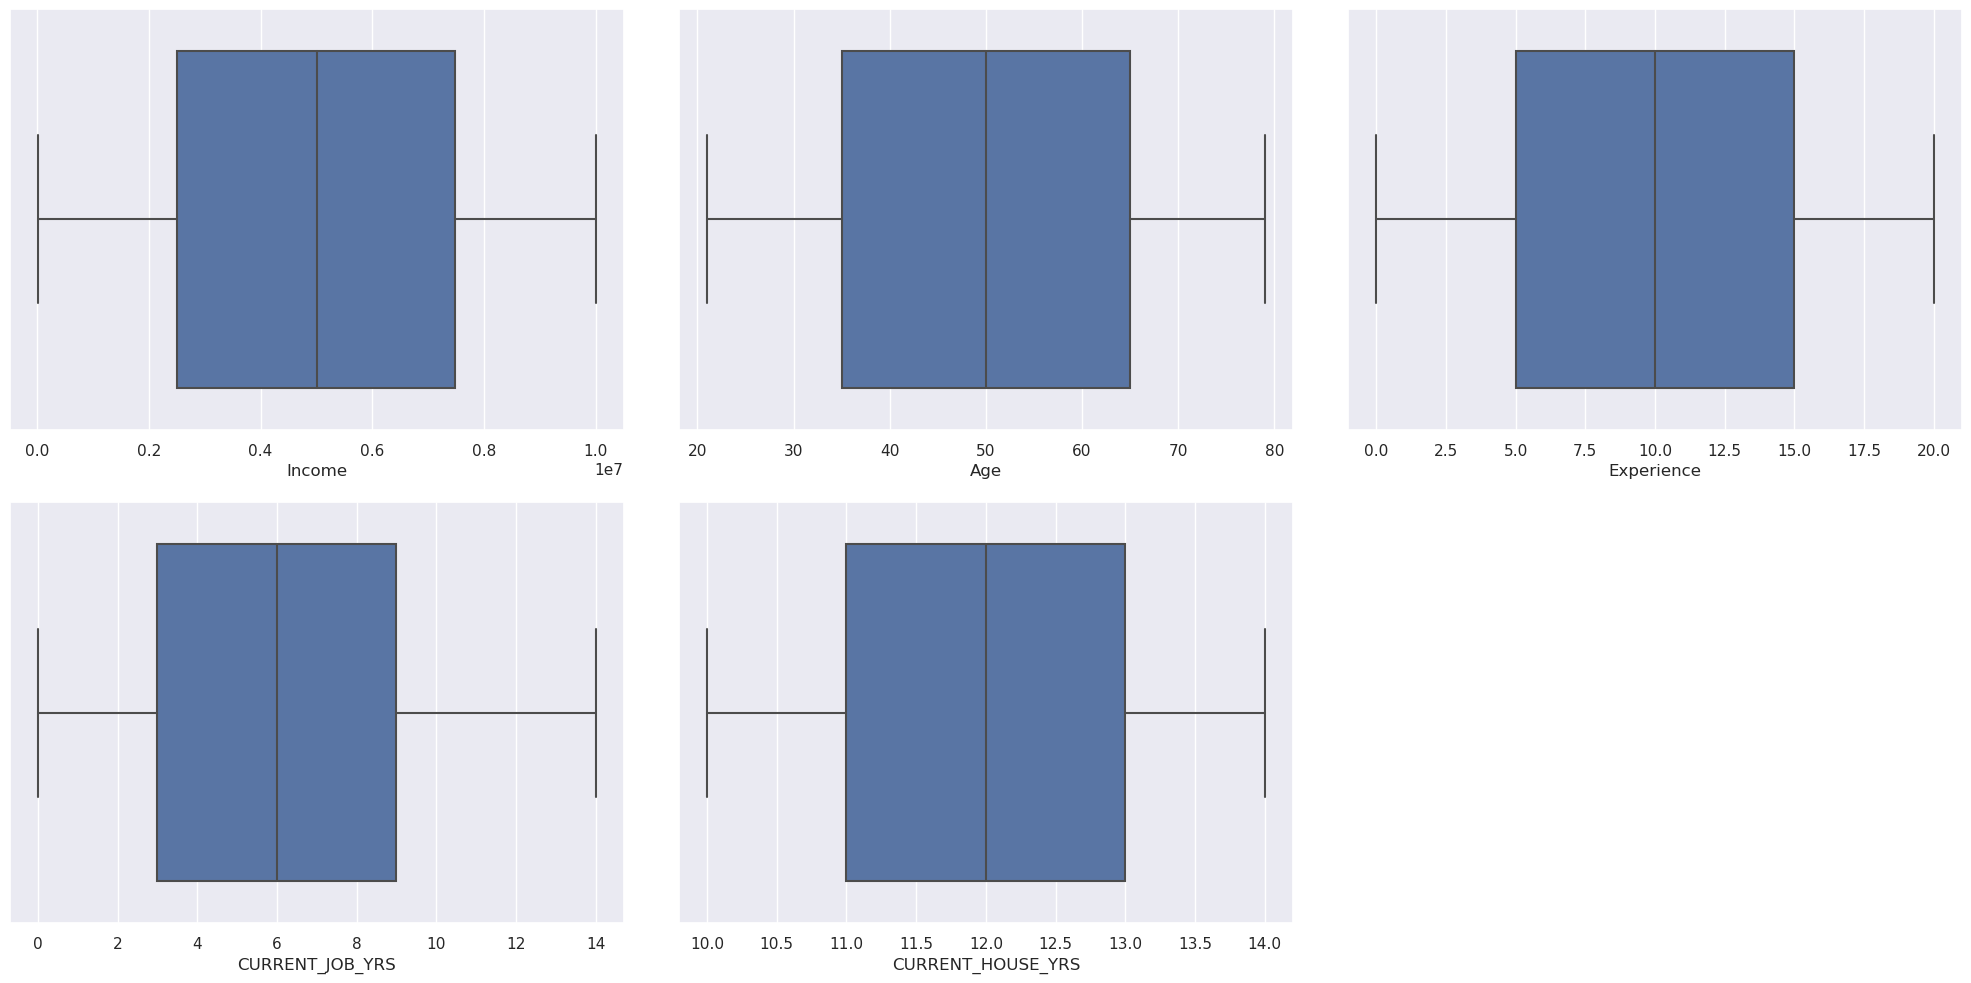

In [8]:
#plot boxplot of numerical features to detect outliers
numeric_features = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
   
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(numeric_features):
    sns.boxplot(x=var, data=train_data, ax=axs[i])

fig.tight_layout()
fig.delaxes(axs[5])
plt.show()
    




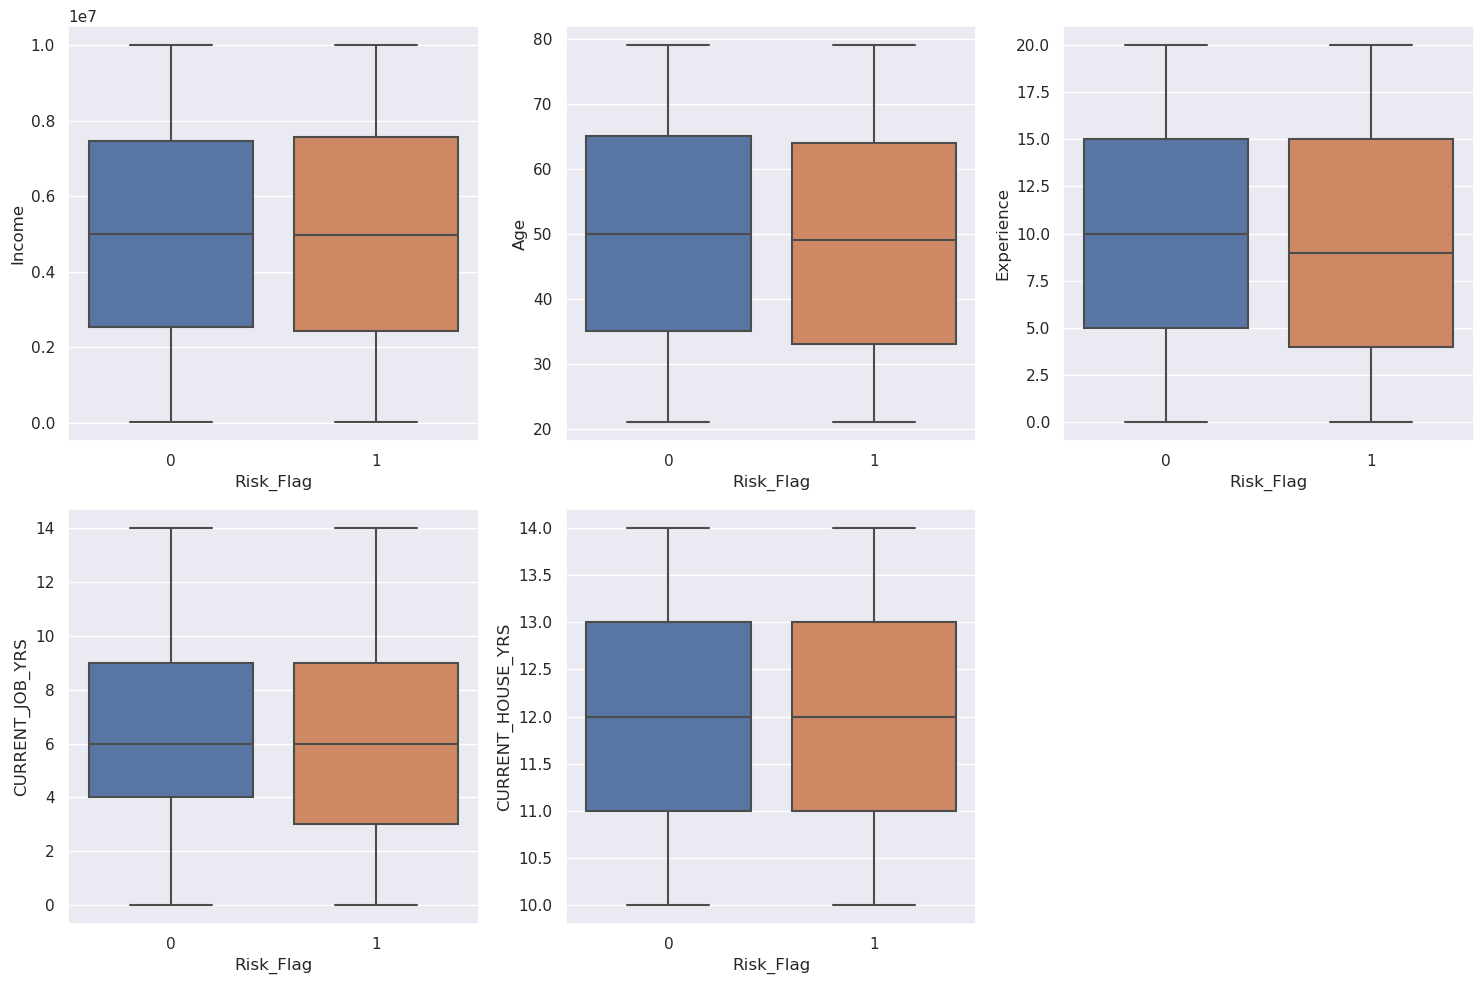

In [9]:

#generate a grid of box plots to visualize the distribution of the specified
#numerical features (numeric_features) with respect to the binary variable 'Risk_Flag'.


numeric_features = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axs = axs.flatten()

for i, var in enumerate(numeric_features):
    sns.boxplot(y=var, x='Risk_Flag', data=train_data, ax=axs[i])

fig.delaxes(axs[5])  
fig.tight_layout()

plt.show()

<Axes: >

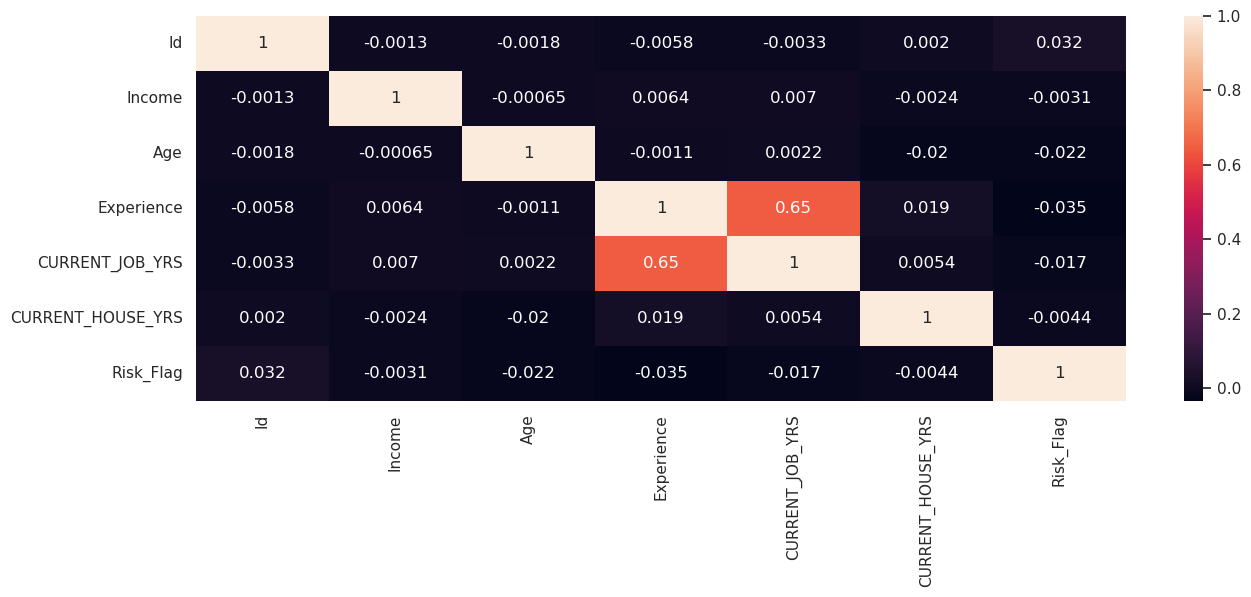

In [10]:
#check correlation between numerical variables and the Risk_Flag variable
correlation = train_data.select_dtypes('number').corr()
plt.figure(figsize=(15,5))
sns.heatmap(correlation, annot=True)

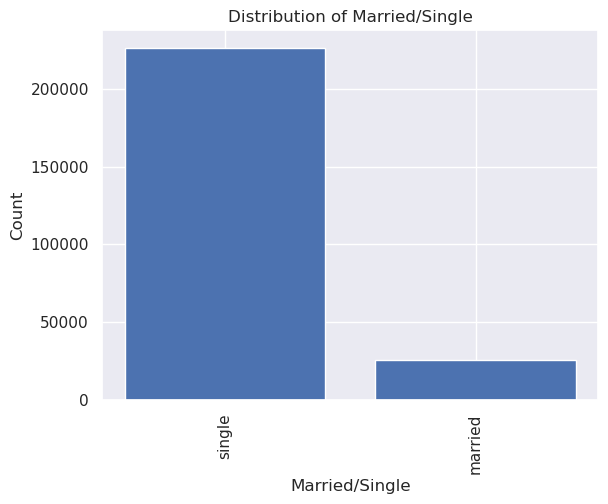

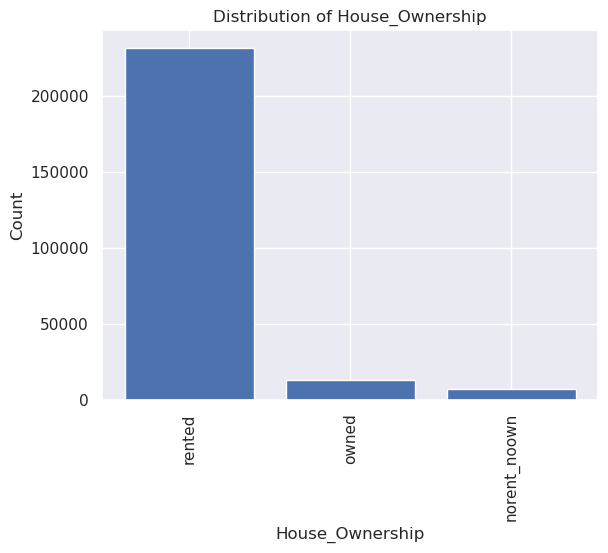

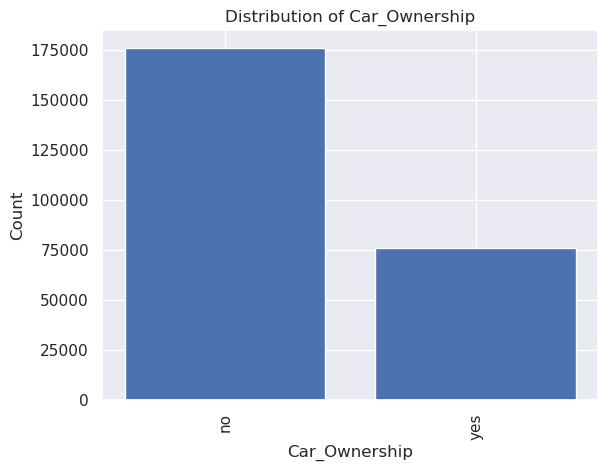

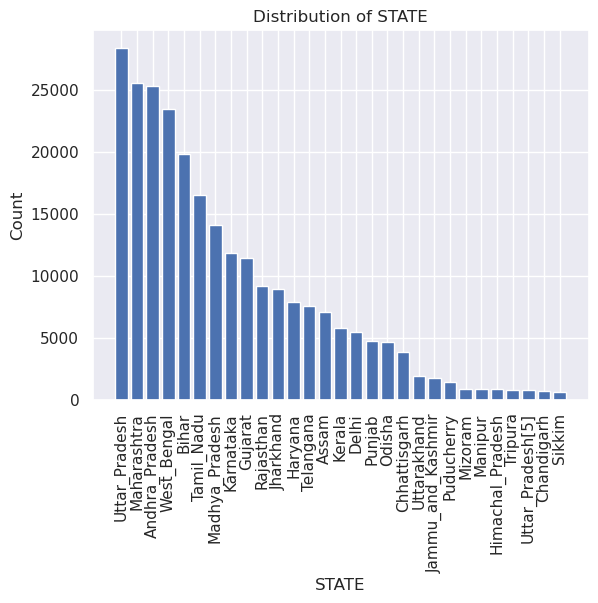

In [11]:
#plot distribution of categorical variables
categorical_features = [ 'Married/Single', 'House_Ownership', 'Car_Ownership', 'STATE']

for feature in categorical_features:
    value_counts = train_data[feature].value_counts()
    plt.bar(value_counts.index, value_counts.values)
    plt.xticks(rotation=90)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Distribution of {feature}')
    plt.show()


In [12]:
train_data.CITY.value_counts()


Vijayanagaram       1259
Bhopal              1208
Bulandshahr         1185
Saharsa[29]         1180
Vijayawada          1172
                    ... 
Ujjain               486
Warangal[11][12]     459
Bettiah[33]          457
Katni                448
Karaikudi            431
Name: CITY, Length: 317, dtype: int64

In [13]:
train_data.Profession.value_counts()

Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer              

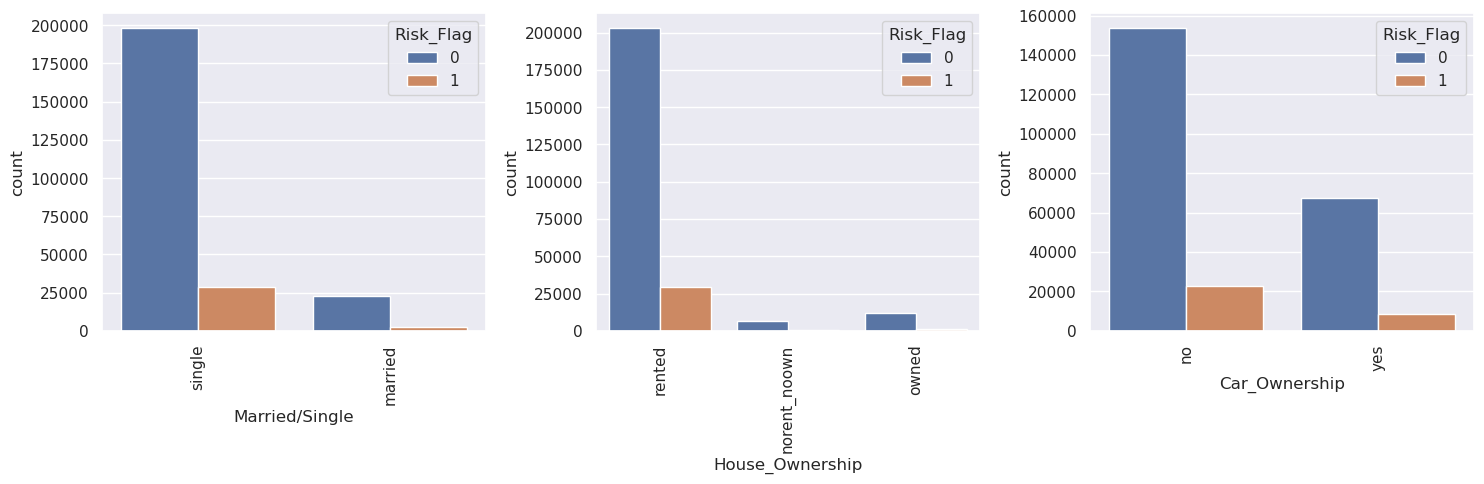

In [14]:
categorical_features= ['Married/Single', 'House_Ownership', 'Car_Ownership']
# create figure with subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(categorical_features ):
    sns.countplot(x=var, hue='Risk_Flag', data=train_data, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

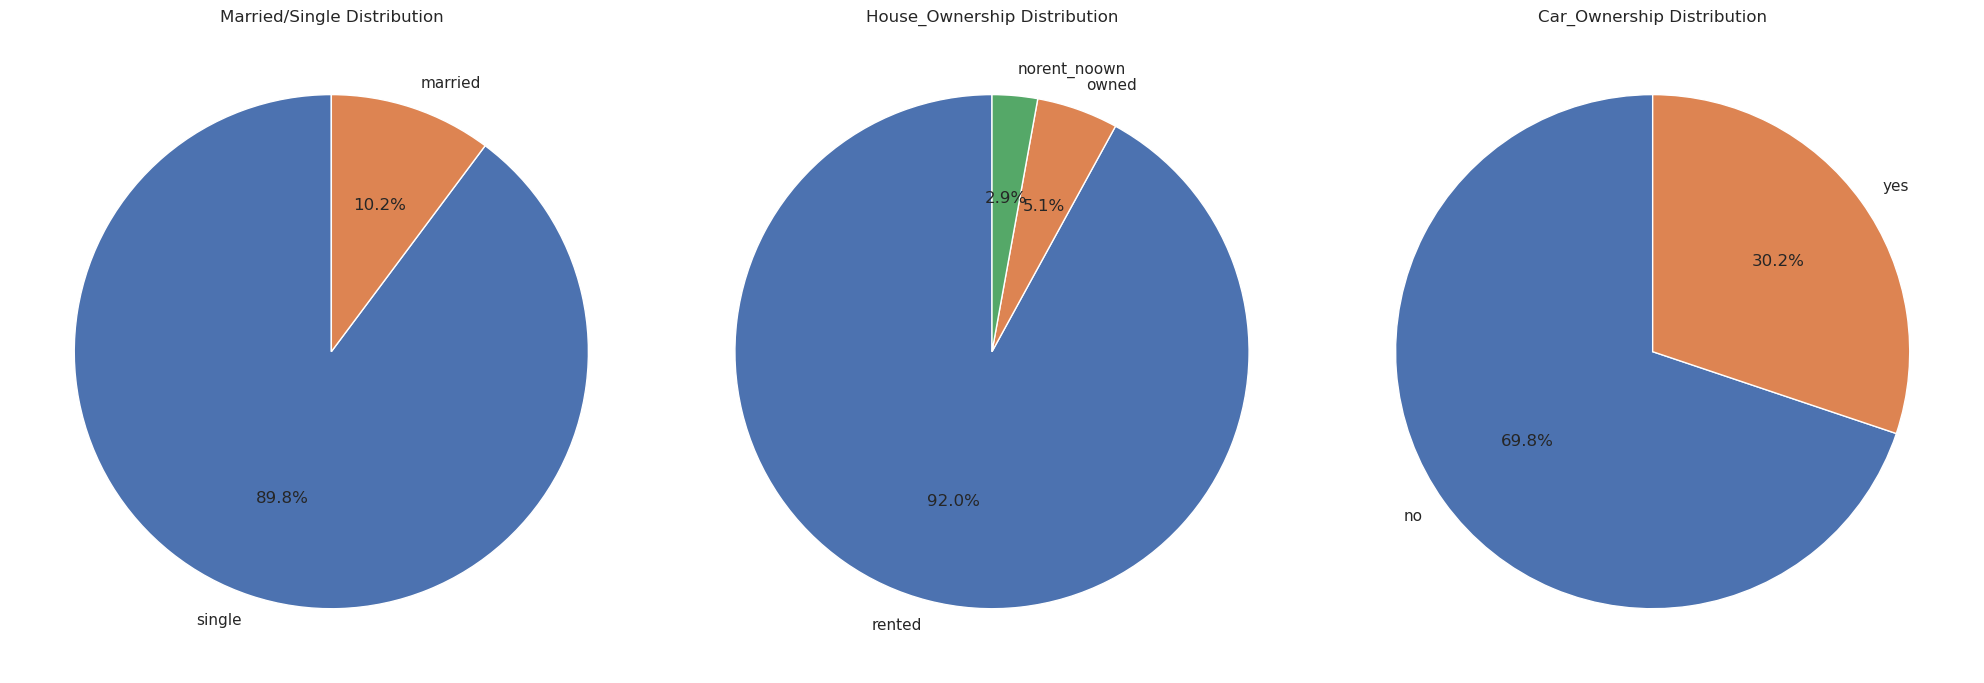

In [15]:
categorical_features= ['Married/Single', 'House_Ownership', 'Car_Ownership']
# create a figure and axes
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 15))

# create a pie chart for each categorical variable
for i, var in enumerate(categorical_features):
    if i < len(axs.flat):
        # count the number of occurrences for each category
        cat_counts = train_data[var].value_counts()

        # create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')


# adjust spacing between subplots
fig.tight_layout()

# show the plot
plt.show()

Prepare data for prediction

In [16]:
train_data.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [7]:
train_data.drop(['Id', 'Experience'], axis=1, inplace=True)

In [8]:
# Importing Label Encoder
from sklearn.preprocessing import LabelEncoder

features = ["Married/Single", "House_Ownership", "Car_Ownership", "Profession",
           "CITY", "STATE"]
label_encoder = LabelEncoder()

for col in features:
    train_data[col] = label_encoder.fit_transform(train_data[col])  

In [9]:
# import train test split
from sklearn.model_selection import train_test_split

X = train_data.drop(["Risk_Flag"], axis=1)
Y = train_data.Risk_Flag

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=train_data.Risk_Flag)

**Prediction**

**Logistic Regression**

In [21]:
# importing logistic regression
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the logistic regression model
lr = LogisticRegression()


# Perform grid search with cross-validation
#grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)
lr.fit(X_train, y_train)

# Print the best hyperparameters found
#print("Best Hyperparameters: ", grid_search.best_params_)

# Get the best model
#best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = lr.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66301
           1       0.00      0.00      0.00      9299

    accuracy                           0.88     75600
   macro avg       0.44      0.50      0.47     75600
weighted avg       0.77      0.88      0.82     75600



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Decision Tree with Hyperparameter Grid Search**

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))





{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.77      0.83     66301
           1       0.16      0.31      0.21      9299

    accuracy                           0.71     75600
   macro avg       0.52      0.54      0.52     75600
weighted avg       0.80      0.71      0.75     75600



**Random Forest**

In [22]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
# Make predictions on the test set using the Random Forest model
y_pred_rf = random_forest.predict(X_test)

# Evaluate the Random Forest model
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     66301
           1       0.60      0.55      0.57      9299

    accuracy                           0.90     75600
   macro avg       0.77      0.75      0.76     75600
weighted avg       0.90      0.90      0.90     75600



**Gradient Boosting Models with Hyperparameter Grid Search**

In [24]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# XGBoost
xgb = XGBClassifier()
# Fit the best XGBoost model on the training data
xgb.fit(X_train, y_train)

# Make predictions on the test set using the XGBoost model
y_pred_xgb = xgb.predict(X_test)

# Evaluate the XGBoost model
print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb))


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     66301
           1       0.65      0.18      0.29      9299

    accuracy                           0.89     75600
   macro avg       0.77      0.59      0.61     75600
weighted avg       0.87      0.89      0.86     75600



**Neural Network**

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Neural Network
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
# Make predictions on the test set using the best MLP model
y_pred_mlp = mlp.predict(X_test)

# Evaluate the MLP model
print("Classification Report for MLP:")
print(classification_report(y_test, y_pred_mlp))


Classification Report for MLP:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     66301
           1       0.23      0.02      0.04      9299

    accuracy                           0.87     75600
   macro avg       0.55      0.50      0.48     75600
weighted avg       0.80      0.87      0.82     75600

